In [ ]:
!pip install pysus
!pip install pandas

In [2]:
import pandas as pd
import seaborn as sb
from sqlalchemy import create_engine
import matplotlib.pylab as plt
from pysus.online_data.SIH import download
from datetime import datetime

In [4]:
estado = 'es'
meses = [i for i in range(1,13)]
anos1 = [2010,2011,2012,2013,2014,2015]
anos2 = [2016,2017,2018,2019,2020,2021]
aux1={}
aux2={}

In [ ]:
def download_pys(estado, ano, mes):
  aux = download(states=estado, years=ano, month=meses)
  return pd.concat([pd.read_parquet(v) for v in aux])


def extract(anos, meses, aux):
  for ano in anos:
    for mes in meses:
        aux[mes, ano] = pd.read_parquet(download(estado, ano, mes))
        print(f"O Arquivo do Mês {mes} do Ano {ano} do Estado do {estado.upper()} foi Baixado!")
a
def concat(aux):
  return pd.concat({k:pd.DataFrame.from_dict(v) for k, v in aux.items()}, axis=0).reset_index()

In [ ]:
# extraindo os dados separadamente
extract(anos1, meses, aux1)
extract(anos2, meses, aux2)

In [ ]:
# concatenando os dois dicionarios
df1 = concat(aux1)
df2 = concat(aux2)

In [ ]:
# juntando os dataframes em um só
sih_es = df1.append(df2)

/tmp/ipykernel_8669/3403513005.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sih_es = df1.append(df2)


In [ ]:
# atribuindo as 3 primeiras colunas nomes
sih_es = sih_es.rename(columns={'level_0':'MES', 'level_1':'ANO'})
sih_es.shape

(1686145, 116)

In [ ]:
# filtra para ter somente as cids de código que começa com F
sih_es = sih_es[sih_es['DIAG_PRINC'].str.contains('F')]
sih_es.shape

In [ ]:
#visualização da tabela pós filtração
sih_es

,MES,ANO,level_2,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
287,1,2015,287,320000,2015,01,05,27187301000122,3214102752267,5,...,,0,0,0,0,0,0,0,0,0
288,1,2015,288,320000,2015,01,05,27187301000122,3214102752278,1,...,,0,0,0,0,0,0,0,0,0
289,1,2015,289,320000,2015,01,05,27187301000122,3214102752278,5,...,,0,0,0,0,0,0,0,0,0
290,1,2015,290,320000,2015,01,05,27187301000122,3214102752289,1,...,,0,0,0,0,0,0,0,0,0
291,1,2015,291,320000,2015,01,05,27187301000122,3214102752289,5,...,,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685905,12,2021,20083,320506,2021,12,03,27443803000177,3221101181474,1,...,,0,0,0,0,0,0,0,0,0
1685918,12,2021,20096,320506,2021,12,03,27443803000177,3221101180540,1,...,,0,0,0,0,0,0,0,0,0
1685991,12,2021,20169,320506,2021,12,03,27443803000177,3221101181694,1,...,,0,0,0,0,0,0,0,0,0
1685999,12,2021,20177,320506,2021,12,03,27443803000177,3221101181705,1,...,,0,0,0,0,0,0,0,0,0


In [ ]:
# visualizaçao das variaveis que não possuem nenhum valor
# sih_es['NUM_FILHOS'].unique(), sih_es['INSTRU'].unique(), sih_es['CID_MORTE'].unique(), sih_es['DIAG_SECUN'].unique()

In [ ]:
# excluindo variaveis que não possuem valores
# sih_es.drop(['NUM_FILHOS', 'INSTRU', 'CID_MORTE','DIAG_SECUN'], axis=1, inplace=True)

In [ ]:
# filtra as colunas que eu desejo
sih_es = sih_es.filter(vars)
sih_es.shape

(23765, 18)

In [ ]:
# trocando os sexos
sexo={'1':'Masculino','3':'Feminino'}
sih_es['SEXO'] = sih_es['SEXO'].replace(sexo)

In [ ]:
sih_es

,N_AIH,MES,ANO,IDADE,SEXO,UF_ZI,NUM_FILHOS,INSTRU,MORTE,CID_MORTE,DIAS_PERM,DIAG_PRINC,DIAG_SECUN,DT_INTER,ANO_CMPT,MES_CMPT,MARCA_UTI,UTI_MES_TO
287,3214102752267,1,2015,32,Masculino,320000,0,0,0,0000,31,F195,0000,20141228,2015,01,00,0
288,3214102752278,1,2015,43,Masculino,320000,0,0,0,0000,0,F105,0000,20141231,2015,01,00,0
289,3214102752278,1,2015,43,Masculino,320000,0,0,0,0000,1,F105,0000,20141231,2015,01,00,0
290,3214102752289,1,2015,55,Masculino,320000,0,0,0,0000,7,F200,0000,20141224,2015,01,00,0
291,3214102752289,1,2015,55,Masculino,320000,0,0,0,0000,31,F200,0000,20141224,2015,01,00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685905,3221101181474,12,2021,35,Feminino,320506,0,0,0,0000,11,F190,0000,20211216,2021,12,00,0
1685918,3221101180540,12,2021,58,Masculino,320506,0,0,0,0000,7,F100,0000,20211203,2021,12,00,0
1685991,3221101181694,12,2021,69,Masculino,320506,0,0,0,0000,13,F102,0000,20211216,2021,12,00,0
1685999,3221101181705,12,2021,34,Masculino,320506,0,0,0,0000,12,F142,0000,20211217,2021,12,00,0


In [ ]:
# descobrindo se possui valores NaN
sih_es.isnull().sum()

N_AIH         0
MES           0
ANO           0
IDADE         0
SEXO          0
UF_ZI         0
NUM_FILHOS    0
INSTRU        0
MORTE         0
CID_MORTE     0
DIAS_PERM     0
DIAG_PRINC    0
DIAG_SECUN    0
DT_INTER      0
ANO_CMPT      0
MES_CMPT      0
MARCA_UTI     0
UTI_MES_TO    0
dtype: int64

<Axes: xlabel='SEXO'>

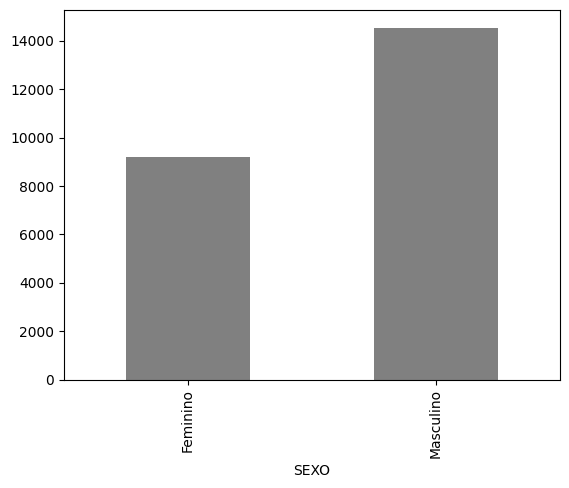

In [ ]:
# grafico de barras dos sexos dos pacientes
grupo_sexo = sih_es.groupby(['SEXO']).size()
grupo_sexo.plot.bar(color='gray')

In [ ]:
# agrupando as cids em um dataframe
grupo_cids = sih_es.groupby(['DIAG_PRINC']).size()
gc = pd.DataFrame(grupo_cids)
gc = gc.rename(columns={"DIAG_PRINC":'CID', 0:'QUANT'})

In [ ]:
# filtrando para as cids que possuem quantidade maiores que 500
gc_maior = gc[(gc.QUANT >= 500)]
gc_maior = gc_maior.sort_values(['QUANT'], ascending=False)
# filtrando para cids que possuem quantidade menor que 500 e maiores que 200
gc_entre = gc[(gc.QUANT <= 500) & (gc.QUANT >= 200)]
gc_entre = gc_entre.sort_values(['QUANT'], ascending=False)

<Axes: xlabel='DIAG_PRINC'>

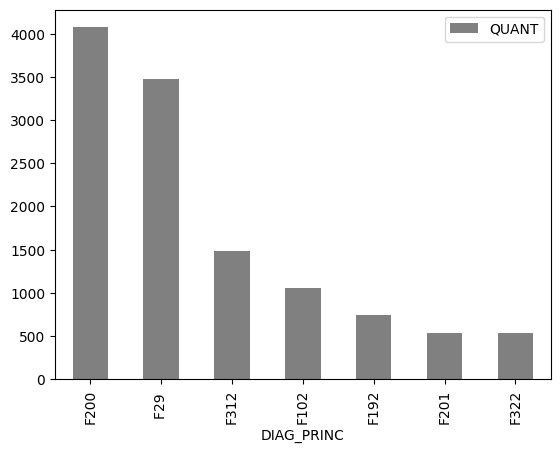

In [ ]:
# visualização da tabela
gc_maior
# grafico
gc_maior.plot.bar(color='gray')

<Axes: xlabel='DIAG_PRINC'>

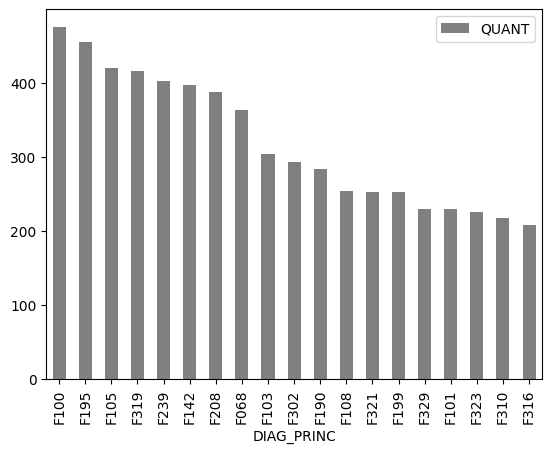

In [ ]:
# visu da tabela
gc_entre
# tabela
gc_entre.plot.bar(color='gray')

In [ ]:
# concatenando as colunas em uma coluna DATA
sih_es['DATA'] = sih_es.apply(lambda x: '%s-%s' % (x['ANO'], x['MES']), axis=1)
# removendo as colunas MES e ANO
sih_es.drop(['MES', 'ANO'], axis=1, inplace=True)
# convertendo o tipo da coluna de String para Date
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
sih_es.DATA = sih_es.DATA.apply(dateparse)

In [ ]:
# criação da tabela separada pra serie temporal com tempo e sexo masculino
temp_series = sih_es['DATA']
temp_series = pd.DataFrame(temp_series)
temp_series = temp_series.join(sih_es['SEXO'])
aux = temp_series.loc[(temp_series['SEXO'] == 'Feminino')]
temp_series=temp_series.drop(aux.index)
temp_series = temp_series.groupby(['DATA']).size()

In [ ]:
temp_series

DATA
2015-01-01    475
2015-02-01    494
2015-03-01    420
2015-04-01    223
2015-05-01    204
             ... 
2021-08-01    210
2021-09-01    200
2021-10-01    128
2021-11-01    178
2021-12-01    119
Length: 84, dtype: int64

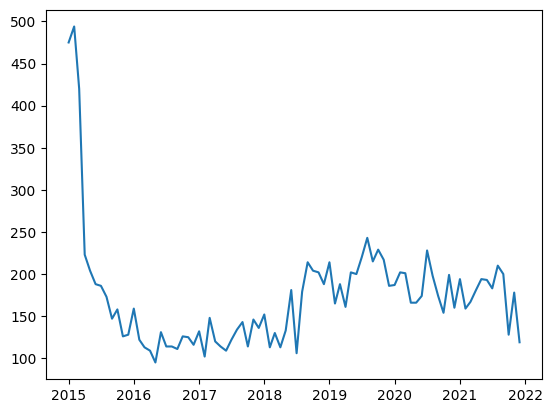

In [ ]:
# episódios que aconteceram com homens
plt.plot(temp_series)

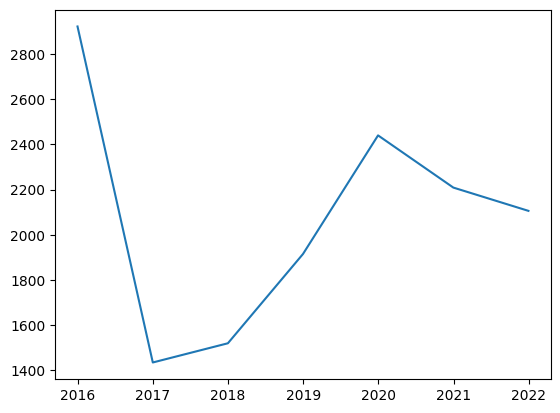

In [ ]:
# serie temporal apenas dos anos
temp_series_ano = temp_series.resample('A').sum()
plt.plot(temp_series_ano)

In [ ]:
# TEMPO COM A QUE MAIS TEVE DIAGNOSTICO - F200
temp_series = sih_es['DATA']
temp_series = pd.DataFrame(temp_series)
temp_series = temp_series.join(sih_es['DIAG_PRINC'])
aux = temp_series.loc[(temp_series['DIAG_PRINC'] != 'F200')]
temp_series = temp_series.drop(aux.index)

In [ ]:
temp_series = temp_series.groupby(['DATA']).size()
temp_series

DATA
2015-01-01    216
2015-02-01    231
2015-03-01    200
2015-04-01    109
2015-05-01    101
             ... 
2021-08-01     23
2021-09-01     23
2021-10-01     29
2021-11-01     29
2021-12-01     14
Length: 84, dtype: int64

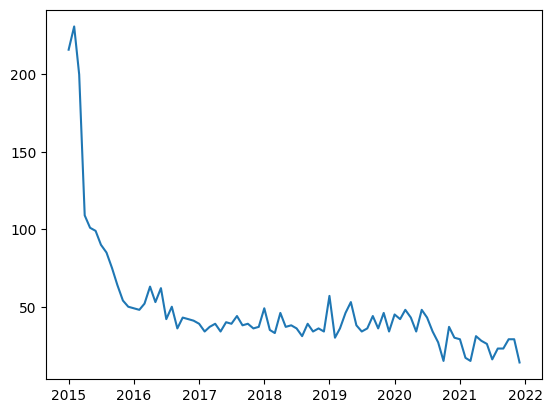

In [ ]:
plt.plot(temp_series)

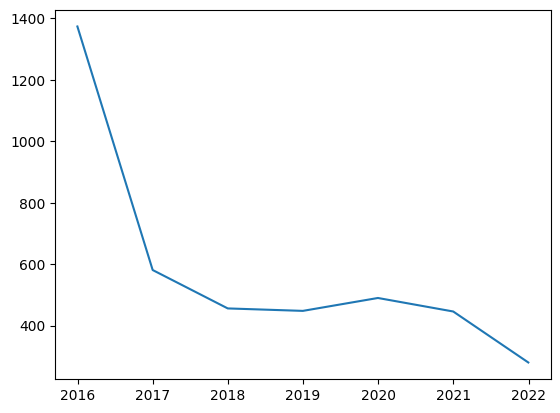

In [ ]:
# visualização por ano
temp_series_ano = temp_series.resample('A').sum()
plt.plot(temp_series_ano)